In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('OnlineRetail.csv',encoding = "ISO-8859-1")
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
# just to know how many Unique values are there for object fields 

print ("Unique InvoiceNo",len(data.InvoiceNo.unique()))
print ("Unique StockCode",len(data.StockCode.unique()))


Unique InvoiceNo 25900
Unique StockCode 4070


In [4]:
data.shape

(541909, 8)

In [5]:
data.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [6]:
# To check and count Missing/Null data in all features 

print ("Is null data present:- ",data.isnull().values.any())

data.isnull().sum()

Is null data present:-  True


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [7]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [8]:
# Can be replaced missing CustomerID with Median value

print ("mean value of customID:", data.CustomerID.mean())          #  Mean value 
print ("Median value of customID:", data.CustomerID.median())        #  Median Value

#df = data
#df['CustomerID'] = df['CustomerID'].fillna(df['CustomerID'].median())


# Dropping CustomerID as of now to take decison on Customer category..
data = data[data['CustomerID'].notna()]

print ("Data dimension after dropping null customerID:",data.shape)

print ("Unique customid values:", len(data.CustomerID.unique()))   #  Checking Unique customId fields 


mean value of customID: 15287.690570239585
Median value of customID: 15152.0
Data dimension after dropping null customerID: (406829, 8)
Unique customid values: 4372


### From Above Unique values we can say that there are approximate <font color=red>4372</font> Unique Customers 
### dealing with the Online Retail Shop, 

* Around 135080 Customers doesn't have CustomerID which is like necessory information , hence customer ID is null we cant comment on their behaviour we are dropping them as of now from the analysis .

* we could replace them using median but it will Bias the decison.

* we can drop description column as its not much important column as its not Biasing the decison..


In [9]:
data.isnull().sum()
data.shape

(406829, 8)

In [10]:
data.drop('Description',axis=1,inplace=True)
data.shape

(406829, 7)

###  Analysis on InvoiceNo..

In [11]:
cancel_order_index = (data['InvoiceNo'].str.contains('^C.*'))
data['InvoiceNo'].str.contains('^C.*').value_counts()

False    397924
True       8905
Name: InvoiceNo, dtype: int64

In [13]:
cancelled_Orders  = data[cancel_order_index]
cancelled_Orders.head()
data.loc[data['InvoiceNo'] == '536391']

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


### From above two cells we can observe that there are around <font color=red>8905</font> cancelled order, 
### also observed that cancelled order Invoice is not matched with successful order Invoiceno by removing Initial 'C' character.

In [14]:
data.head()

,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [15]:
data['Bill'] = data.Quantity * data.UnitPrice
data.head()


,InvoiceNo,StockCode,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Bill
0,536365,85123A,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34


In [16]:
# We can remove the unwanted Columns like, Country, UnitPrice, Quantity, StockCode from dataframe 

data.drop(['StockCode','Quantity','UnitPrice','Country'], axis=1, inplace=True)
data.head()

,InvoiceNo,InvoiceDate,CustomerID,Bill
0,536365,12/1/2010 8:26,17850.0,15.30
1,536365,12/1/2010 8:26,17850.0,20.34
2,536365,12/1/2010 8:26,17850.0,22.00
3,536365,12/1/2010 8:26,17850.0,20.34
4,536365,12/1/2010 8:26,17850.0,20.34


### Can measure Aggregate Bills - like revenue generated from each customer Monthly 

In [17]:

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],format='%m/%d/%Y %H:%M')
data['InvoiceDate'].min()

'''

data['InvoiceMonth'] =  data['InvoiceDate'].values.astype('datetime64[M]')
data.head()
print (data.shape)

# Dropping other non -related info or lets put things out of box like stock, country etc ..

df = data[['CustomerID', 'InvoiceMonth', 'Bill']].copy()
df.head()

monthly_bills = df.groupby(['CustomerID','InvoiceMonth'])[['Bill']].agg('sum').reset_index()
monthly_bills.head()

monthly_bills.shape
'''


"\n\ndata['InvoiceMonth'] =  data['InvoiceDate'].values.astype('datetime64[M]')\ndata.head()\nprint (data.shape)\n\n# Dropping other non -related info or lets put things out of box like stock, country etc ..\n\ndf = data[['CustomerID', 'InvoiceMonth', 'Bill']].copy()\ndf.head()\n\nmonthly_bills = df.groupby(['CustomerID','InvoiceMonth'])[['Bill']].agg('sum').reset_index()\nmonthly_bills.head()\n\nmonthly_bills.shape\n"

In [18]:
'''
# Customers are not continuous in buying the things .. we can see irregularities in by checking customers purchase ..
#e.g. 
monthly_bills[monthly_bills['CustomerID'] == 12347.0]
'''

"\n# Customers are not continuous in buying the things .. we can see irregularities in by checking customers purchase ..\n#e.g. \nmonthly_bills[monthly_bills['CustomerID'] == 12347.0]\n"

In [19]:
'''
final_df = monthly_bills[['CustomerID','Bill']].copy()
final_df.head()
'''

"\nfinal_df = monthly_bills[['CustomerID','Bill']].copy()\nfinal_df.head()\n"

In [20]:
'''
final_df.head()
final_df.groupby(['CustomerID'])[['Bill']].agg('sum').reset_index()
#final_df.head()
'''

"\nfinal_df.head()\nfinal_df.groupby(['CustomerID'])[['Bill']].agg('sum').reset_index()\n#final_df.head()\n"

In [21]:
data['InvoiceDate'].min(), data['InvoiceDate'].max()

(Timestamp('2010-12-01 08:26:00'), Timestamp('2011-12-09 12:50:00'))

### As we can see here we need to segeregate Customers we can directly think of finding Recency, Frequency & Monetory and Based on we can come to conclusion 

* so using GroupBy close and finding RFM ..

#### Lets use RFM recency, frequency, monetary for 
#### customer segmentation using group by Columns like InvoiceDate, InvoiceNo, & Revenue/Bills

In [22]:
import datetime as dt
PRESENT = dt.datetime(2021,7,4)
#print (PRESENT)
#data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
#data.head()

rfm= data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (PRESENT - date.max()).days,
                                        'InvoiceNo': lambda num: len(num),
                                        'Bill': lambda price: price.sum()})

In [23]:
rfm.columns



Index(['InvoiceDate', 'InvoiceNo', 'Bill'], dtype='object')

In [24]:
# Change the name of columns
rfm.columns=['recency','frequency','monetary']
rfm['recency'] = rfm['recency'].astype(int)
rfm.head()

,recency,frequency,monetary
CustomerID,,,
12346.0,3819,2,0.00
12347.0,3496,182,4310.00
12348.0,3569,31,1797.24
12349.0,3512,73,1757.55
12350.0,3804,17,334.40


In [25]:
# Devide results in Lowest recency, Highest Frequency and Highest Monetary , based on which we can calculate the score 
rfm['r_quartile'] = pd.qcut(rfm['recency'], 4, ['1','2','3','4'])
rfm['f_quartile'] = pd.qcut(rfm['frequency'], 4, ['4','3','2','1'])
rfm['m_quartile'] = pd.qcut(rfm['monetary'], 4, ['4','3','2','1'])

In [26]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile
CustomerID,,,,,,
12346.0,3819,2,0.00,4,4,4
12347.0,3496,182,4310.00,1,1,1
12348.0,3569,31,1797.24,3,3,1
12349.0,3512,73,1757.55,2,2,1
12350.0,3804,17,334.40,4,4,3


In [27]:
#Aggregate values of Quartile to calculate RFM score 

rfm['RFM_Score'] = rfm.r_quartile.astype(str)+ rfm.f_quartile.astype(str) + rfm.m_quartile.astype(str)
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,3819,2,0.00,4,4,4,444
12347.0,3496,182,4310.00,1,1,1,111
12348.0,3569,31,1797.24,3,3,1,331
12349.0,3512,73,1757.55,2,2,1,221
12350.0,3804,17,334.40,4,4,3,443


In [28]:
# Filter out Top/Best cusotmers

rfm[rfm['RFM_Score']=='111'].sort_values('monetary', ascending=False).head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
14646.0,3495,2085,279489.02,1,1,1,111
18102.0,3494,433,256438.49,1,1,1,111
17450.0,3502,351,187482.17,1,1,1,111
14911.0,3495,5903,132572.62,1,1,1,111
14156.0,3503,1420,113384.14,1,1,1,111


### Conclusion: 
* Customer segmentation gets easy using RFM and we can get top customer by getting values of Recency, Frequemcy and Monetary 
* UnitPrice and Units gives us total invoice value for each customers for unique date
* Cancelled order by 'C' initial in Invoice may reduce Monetory
* Description is ignored as it has no impact as of now on customer segmentation as Monery and frequecy did the work for us 
* There are few CustomerID which are not present - it may impact the results but as of now i have neglected

# Applying Algorithms and finding Accuracy of Model 

In [29]:
from sklearn.cluster import KMeans

In [32]:
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score
CustomerID,,,,,,,
12346.0,3819,2,0.00,4,4,4,444
12347.0,3496,182,4310.00,1,1,1,111
12348.0,3569,31,1797.24,3,3,1,331
12349.0,3512,73,1757.55,2,2,1,221
12350.0,3804,17,334.40,4,4,3,443


In [35]:
X = rfm.iloc[:, [1,2]]
X.head()

,frequency,monetary
CustomerID,,
12346.0,2,0.00
12347.0,182,4310.00
12348.0,31,1797.24
12349.0,73,1757.55
12350.0,17,334.40


In [38]:
X = rfm.iloc[:,[1,2]].values
X

array([[2.00000e+00, 0.00000e+00],
       [1.82000e+02, 4.31000e+03],
       [3.10000e+01, 1.79724e+03],
       ...,
       [1.30000e+01, 1.76600e+02],
       [7.56000e+02, 2.09488e+03],
       [7.00000e+01, 1.83728e+03]])

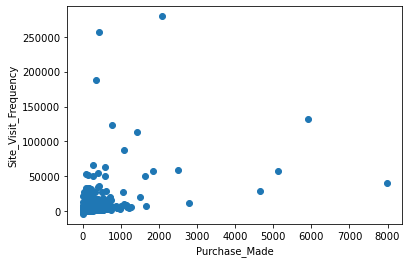

In [39]:
plt.scatter(X[:,0], X[:,1])
plt.xlabel ('Purchase_Made')
plt.ylabel ('Site_Visit_Frequency')
plt.show()

In [40]:
from sklearn.cluster import KMeans

In [41]:
SSE = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(X)
    SSE.append(kmeans.inertia_)

In [42]:
SSE

[295530642773.781,
 100231663452.43044,
 49372697548.796036,
 30387713110.103886,
 18032976214.376373,
 11780679471.653934,
 8582805738.524055,
 5656863929.496704,
 4178905769.747288,
 3252812894.0935483,
 2537223230.299333,
 2078003342.2717378,
 1810975323.6312873,
 1578674263.9812822]

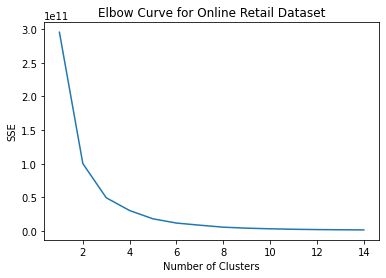

In [44]:
plt.plot(range(1,15), SSE)
plt.title ('Elbow Curve for Online Retail Dataset')
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.show()

In [45]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
Y_kmeans = kmeans.fit_predict(X)
Y_kmeans

array([0, 0, 0, ..., 0, 0, 0])

In [46]:
X[Y_kmeans==0,0]

array([  2., 182.,  31., ...,  13., 756.,  70.])

In [47]:
X[Y_kmeans==0,1]

array([   0.  , 4310.  , 1797.24, ...,  176.6 , 2094.88, 1837.28])

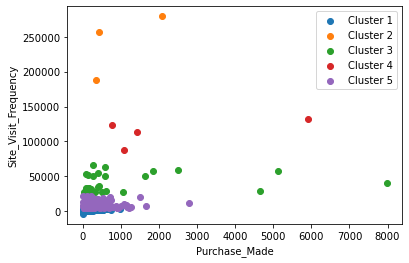

In [48]:
plt.scatter (X[Y_kmeans== 0,0], X[Y_kmeans==0,1], label = 'Cluster 1')
plt.scatter (X[Y_kmeans== 1,0], X[Y_kmeans==1,1], label = 'Cluster 2')
plt.scatter (X[Y_kmeans== 2,0], X[Y_kmeans==2,1], label = 'Cluster 3')
plt.scatter (X[Y_kmeans== 3,0], X[Y_kmeans==3,1], label = 'Cluster 4')
plt.scatter (X[Y_kmeans== 4,0], X[Y_kmeans==4,1], label = 'Cluster 5')
plt.xlabel ('Purchase_Made')
plt.ylabel ('Site_Visit_Frequency')
plt.legend()
plt.show()

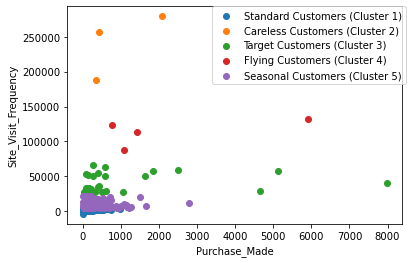

In [49]:
plt.scatter (X[Y_kmeans== 0,0], X[Y_kmeans==0,1], label = 'Standard Customers (Cluster 1)')
plt.scatter (X[Y_kmeans== 1,0], X[Y_kmeans==1,1], label = 'Careless Customers (Cluster 2)')
plt.scatter (X[Y_kmeans== 2,0], X[Y_kmeans==2,1], label = 'Target Customers (Cluster 3)')
plt.scatter (X[Y_kmeans== 3,0], X[Y_kmeans==3,1], label = 'Flying Customers (Cluster 4)')
plt.scatter (X[Y_kmeans== 4,0], X[Y_kmeans==4,1], label = 'Seasonal Customers (Cluster 5)')
plt.xlabel ('Purchase_Made')
plt.ylabel ('Site_Visit_Frequency')
plt.legend(bbox_to_anchor=(1.01, 1),borderaxespad=0)
plt.show()

In [56]:
rfm['Cluster_Group'] = Y_kmeans
rfm.head()

,recency,frequency,monetary,r_quartile,f_quartile,m_quartile,RFM_Score,Cluster_Group
CustomerID,,,,,,,,
12346.0,3819,2,0.00,4,4,4,444,0
12347.0,3496,182,4310.00,1,1,1,111,0
12348.0,3569,31,1797.24,3,3,1,331,0
12349.0,3512,73,1757.55,2,2,1,221,0
12350.0,3804,17,334.40,4,4,3,443,0


In [110]:
X = rfm.iloc[:, [1,2]]
X.head()
rfm.to_csv('file1.csv')
rfm_new = pd.read_csv('file1.csv',skiprows=0)
rfm_new.head()


y = rfm_new['Cluster_Group']
X = rfm_new.drop(['CustomerID', 'Cluster_Group', 'recency', 'r_quartile', 'f_quartile','m_quartile','RFM_Score'], axis=1)
#X1 = rfm_new.drop(['CustomerID', 'Cluster_Group', 'Country', 'Last_Purchase_Date'], axis=1)
#online1.head()
y = rfm_new['Cluster_Group']
print (y.head())
print (X.head())

0    0
1    0
2    0
3    0
4    0
Name: Cluster_Group, dtype: int64
   frequency  monetary
0          2      0.00
1        182   4310.00
2         31   1797.24
3         73   1757.55
4         17    334.40


In [111]:
#X = rfm_new.iloc[:,[2,3]]
#y = rfm_new['Cluster_Group']
#X.head()

In [112]:
#y = rfm_new.iloc[:,[8]]
#y.head()
#y.Cluster_Group.unique()

#### Creation of Train & Test Data Frames for modelling & futher processes

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=40)
print (X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#print (y_train.head())

(3497, 2) (875, 2) (3497,) (875,)


#### APPLICATION OF VARIOUS MODELS on Train & Test data
 - Evaluation of Model Accuracy to see whether the model is perfectly working with the Train & Test data

-  Evaluation of Prediction Accuracy of Test data on models/ algorithms applied

#### Using K-Neighbors Classifier

In [115]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import numpy as np

k_range = range (1,15)
scores = {}
scores_list = []
error = []

for k in k_range:
    knn = KNeighborsClassifier (n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict (X_test)
    
    #print (y_pred)
    scores[k] = metrics.accuracy_score (y_test, y_pred)
    scores_list.append (metrics.accuracy_score(y_test, y_pred))
    error.append(np.mean( y_pred != y_test))
    
    
    


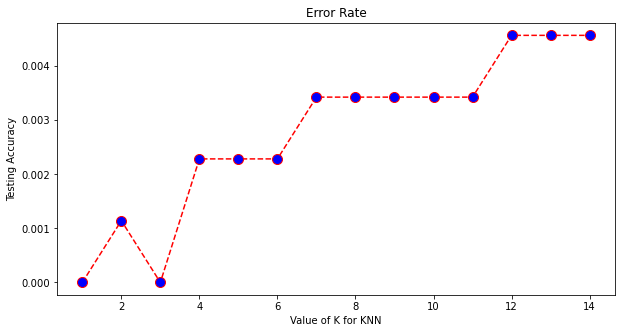

In [117]:
plt.figure(figsize= (10,5))
plt.plot(range(1,15), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title ('Error Rate')
plt.xlabel ('Value of K for KNN')
plt.ylabel ('Testing Accuracy')
plt.show()

In [118]:
from sklearn.metrics import classification_report, confusion_matrix

In [119]:
print (confusion_matrix(y_test, y_pred))

[[820   0   0   0   0]
 [  0   0   1   0   0]
 [  0   0   2   0   0]
 [  0   0   2   0   0]
 [  1   0   0   0  49]]


In [120]:
print(f'Model Accuracy : {knn.score(X_train, y_train)}')

Model Accuracy : 0.9985702030311696


In [121]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       0.00      0.00      0.00         1
           2       0.40      1.00      0.57         2
           3       0.00      0.00      0.00         2
           4       1.00      0.98      0.99        50

    accuracy                           1.00       875
   macro avg       0.48      0.60      0.51       875
weighted avg       0.99      1.00      0.99       875



C:\Users\Jigar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Accuracy Got Above in K-Neighbors Classifier: 99.99%

## Using Decision Tree Classifier

In [123]:
from sklearn.tree import DecisionTreeClassifier

In [124]:
dtree = DecisionTreeClassifier(random_state = 40)
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [126]:
print(f'Model Accuracy : {dtree.score(X_train, y_train)}')

Model Accuracy : 1.0


In [129]:
predictions = dtree.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00        50

    accuracy                           1.00       875
   macro avg       1.00      1.00      1.00       875
weighted avg       1.00      1.00      1.00       875



## Using Random Forest Classifier

In [130]:
from sklearn.ensemble import RandomForestClassifier

In [132]:
rand_fc = RandomForestClassifier(n_estimators=200, random_state=40)
rand_fc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=40)

In [134]:
n_nodes = []
max_depths = []

for ind_tree in rand_fc.estimators_:
    n_nodes.append(ind_tree.tree_.node_count)
    max_depths.append(ind_tree.tree_.max_depth)

In [136]:
print(f'Model Accuracy Random Forest Classifier: {rand_fc.score(X_train, y_train)}')

Model Accuracy Random Forest Classifier: 1.0


In [137]:
rand_fc_pred = rand_fc.predict(X_test)
print(classification_report(y_test, rand_fc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       820
           1       0.00      0.00      0.00         1
           2       0.40      1.00      0.57         2
           3       0.00      0.00      0.00         2
           4       1.00      1.00      1.00        50

    accuracy                           1.00       875
   macro avg       0.48      0.60      0.51       875
weighted avg       1.00      1.00      1.00       875



C:\Users\Jigar\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
